# Graduate Rotational Internship Program
# Task 5
# Business analysis 
**Shashank Kumar**

### Importing Esential Librery for Vsualization and Data analysis

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading .csv Dataset and printing top 5 column

In [190]:
df =pd.read_csv('samplesuperstore.csv')

In [191]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Check for any null value in Dataset

In [192]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Check for Duplicate value

In [193]:
df.duplicated().sum()

17

### Drop all possible Duplicate value

In [194]:
df.drop_duplicates(keep='first',inplace=True)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Printing Datatypes of all columns and name of columns 

In [195]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [196]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [197]:
np.shape(df)

(9977, 13)

#### By finding uniqueness of  Country we got  only United State is present in dataset so we can simpaly drop this column. Because this is common for all the rows.

In [198]:
df['Country'].unique()

array(['United States'], dtype=object)

In [199]:
df.drop("Country", axis = 1, inplace=True)

In [200]:
df.columns
np.shape(df)

(9977, 12)

In [201]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### By describe() method we got the basic statatics of dataset like min, standerd deviation,count etc

In [202]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


### By corr() method we find that how much each label is  related to each other 
***Its value varies from -1 to 1***
**+1 means both the label has strong correlation and it decrease from +1 to -1 and simultaneously correlation in specific label also decreases**

In [203]:
cor =df.corr()
cor

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


#### With help of heatmap we can plot the correlation of variables which is easy to analyze
* In following map we can analyze that different colur represent different valu of correlation. It is one for same variable and represented by cream color and least correlated is sales v/s discount and this is represented by nevy blue color. How the color varies with different value can be analyzed by given colorbar.

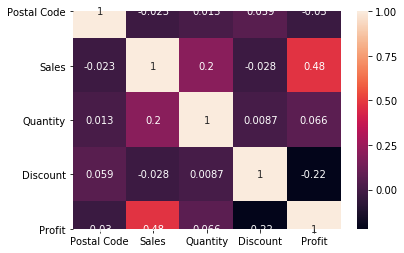

In [204]:
sns.heatmap(cor,annot =True)

#### In this bar plot we are comparing different categories and their respective Sales count . By analyzing this plot we can see that maximum sales occur in Technology category after that Furniture and least in Office supplies.

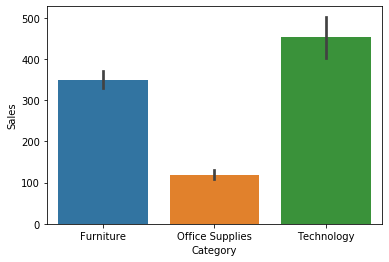

In [205]:
sns.barplot(df['Category'],df['Sales'])

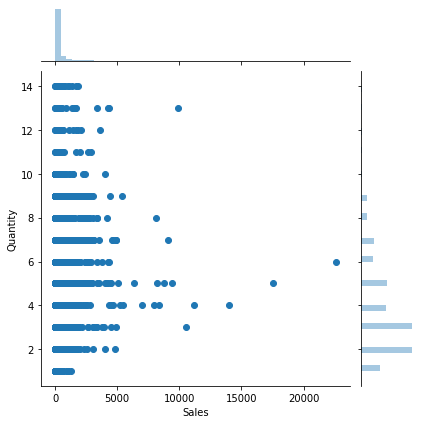

In [206]:
sns.jointplot(x='Sales',y= 'Quantity', data=df)

### Here we are finding all type of discount the shop is providing and than we are finding maximum and minimum value of the discount.


In [207]:
Dis =df['Discount'].unique()
Dis
mx =max(df['Discount'])
mn =min(df['Discount'])
print('max value of discount is mx',mx)
print('min value of Discount is ',mn)

max value of discount is mx 0.8
min value of Discount is  0.0


In [208]:
max_dis=df[df['Discount'] ==mx]
min_dis =df[df['Discount']==mn]

### Here we are ploting regplot to find relation between sales and profit at  particular discount .By analyzing the plot at min and max value of discount we found that at max value of discount (0.8) we are getting linear relationship but with negative slope that shows that profit will decrease with increase in sales at this discount value . So This is not reliable.

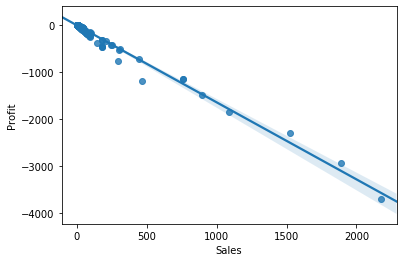

In [209]:
sns.regplot(x ='Sales',y ='Profit',data =max_dis)

### Here we are ploting regplot to find relation between sales and profit at  particular discount .By analyzing the plot at min and max value of discount we found that at min value of discount (0.0) we are getting linear relationship and with positive slope that shows that profit will increase with increase in sales at this discount value . So This is reliable condition.

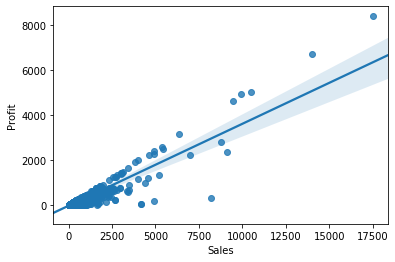

In [210]:
sns.regplot(x ='Sales',y='Profit',data =min_dis)

#### Here we are finding the stuff count of different catrgory and sub-category  which have been sold out.

In [211]:
sub_cat =df['Sub-Category'].value_counts()
cat =df['Category'].value_counts()
print('sub catogery are',sub_cat)
print('catogary are',cat)


sub catogery are Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64
catogary are Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


### these two following count plot is showing count of category and sub category its for compare purpose

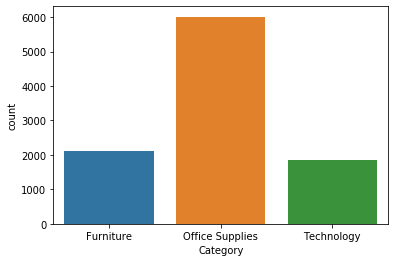

In [212]:
sns.countplot(x ='Category',data =df)

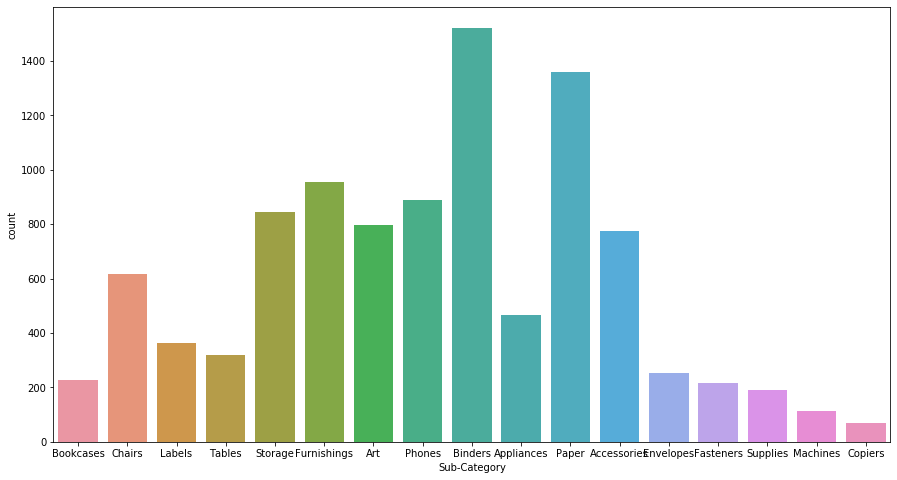

In [213]:
plt.figure(figsize=(15,8))
sns.countplot(x ='Sub-Category',data =df)



### This bar plot shows the relation between sales of different sub category .By analyzing this plot we can conclude that copiers have maximum saling ratio and this is least for Fasteners than art type stuff.

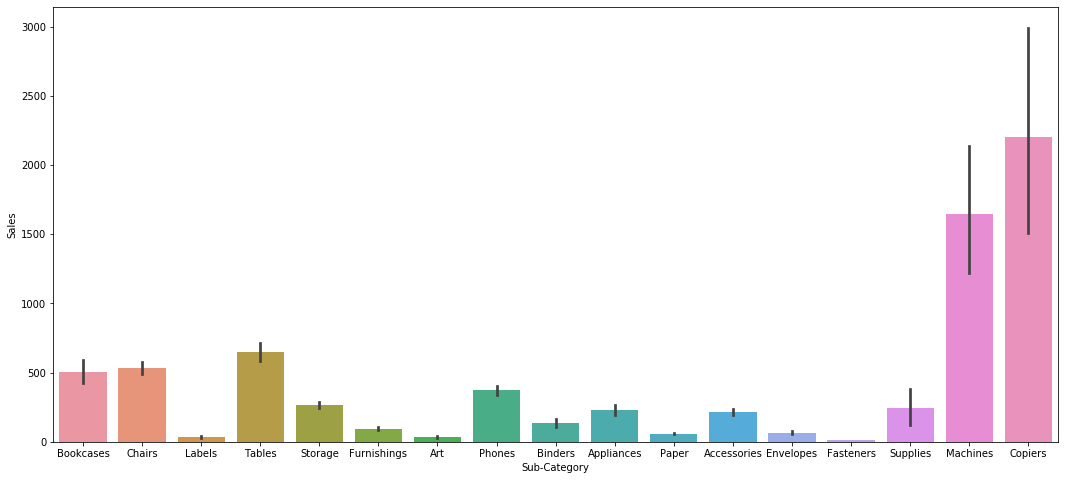

In [214]:
plt.figure(figsize=(18,8))
sns.barplot(df['Sub-Category'],df['Sales'],data =df)


#### This bar plot is giving relation between category and sub-category of seles. So we can conclude that most of sub-category related with Office supplies and for sub-category involved with Technology. By this and analyzing profit vs sub-category graph we can conclude is this benificial or not

<BarContainer object of 9977 artists>

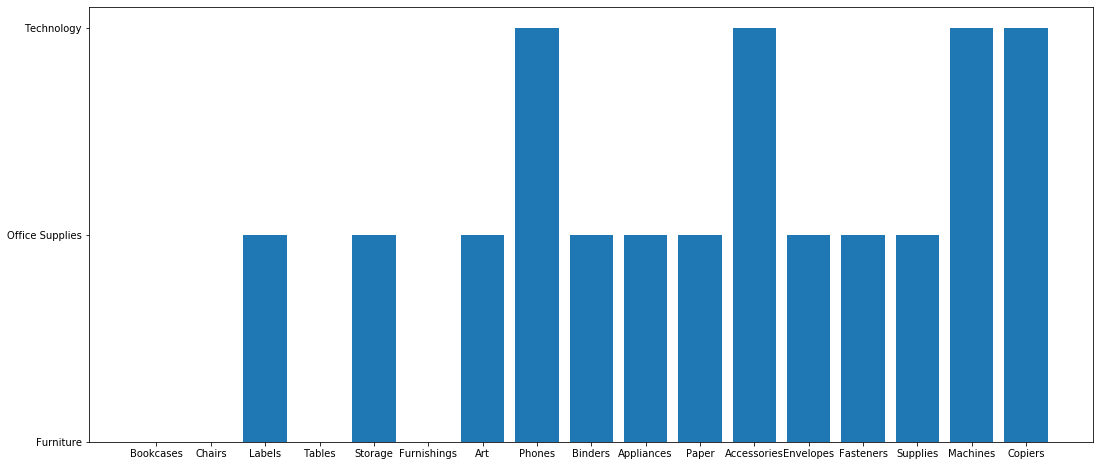

In [215]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data =df)

#### This bar plot is among 3 variables sub-category,sales and profit means by analyzing we can find the profit and sales of each sub-category .In graph we can see that for phones profit is not good according to its sales but in case of copiers we can see that less no of sales is giving more  profit.
                                         So we can increase  its sales in order to get more profit

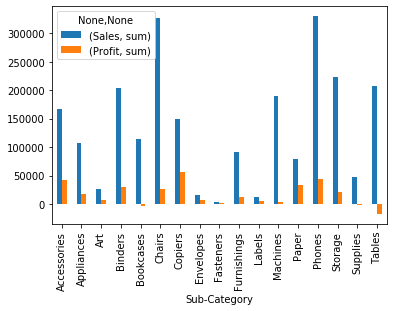

In [216]:

df.groupby(['Sub-Category'])['Sales','Profit'].agg(['sum']).plot.bar()
plt.show()

#### This bar plot is among 3 variables category,sales and profit means by analyzing we can find the profit and sales of each category .In graph we can see that for Technology category  profit is good as its sales is also maximm .

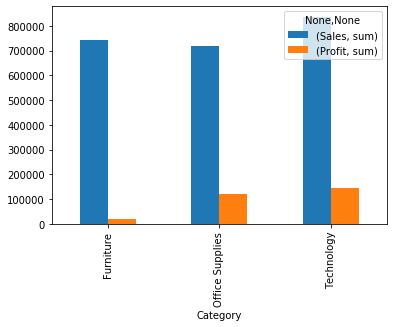

In [217]:
df.groupby(['Category'])['Sales','Profit'].agg(['sum']).plot.bar()
plt.show()

In [218]:
df['Profit'].sort_values()

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
          ...    
4098    4630.4755
9039    4946.3700
4190    5039.9856
8153    6719.9808
6826    8399.9760
Name: Profit, Length: 9977, dtype: float64

In [219]:
state_profit=df.groupby(['State']).Profit.mean().reset_index()
state_profit

,State,Profit
0,Alabama,94.865989
1,Arizona,-15.303235
2,Arkansas,66.811452
3,California,38.241878
4,Colorado,-35.867351
5,Connecticut,42.823071
6,Delaware,103.930988
7,District of Columbia,105.958930
8,Florida,-8.875461
9,Georgia,88.315453


In [220]:
state_sale =df.groupby(['State'])['Sales'].mean().reset_index()
state_sale

,State,Sales
0,Alabama,319.846557
1,Arizona,157.508933
2,Arkansas,194.635500
3,California,229.246629
4,Colorado,176.418231
5,Connecticut,163.223866
6,Delaware,285.948635
7,District of Columbia,286.502000
8,Florida,233.612815
9,Georgia,266.825217


### Here we are finding the dataframe which consist of State with their sales number and profit 

In [221]:

result =pd.merge(state_profit,state_sale)
result

,State,Profit,Sales
0,Alabama,94.865989,319.846557
1,Arizona,-15.303235,157.508933
2,Arkansas,66.811452,194.635500
3,California,38.241878,229.246629
4,Colorado,-35.867351,176.418231
5,Connecticut,42.823071,163.223866
6,Delaware,103.930988,285.948635
7,District of Columbia,105.958930,286.502000
8,Florida,-8.875461,233.612815
9,Georgia,88.315453,266.825217


### This groupby plot is among state and their respective total sales vs total profit .So by analyzing this graph we conclude that  Wyoming consist maximum no of sales while max profit happens in vermont

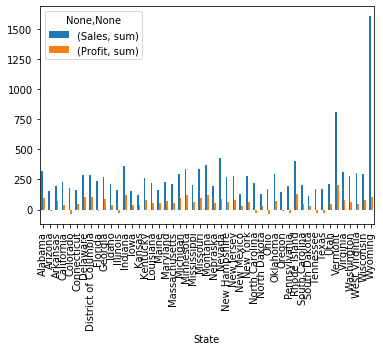

In [222]:

result.groupby(['State'])['Sales','Profit'].agg(['sum']).plot.bar()
plt.show()

In [223]:
df['Discount']=df['Discount']*100

#### This groupby bar plot is giving sales and profit with respect of discount in each region .So we can see that in west region discount is not more but sales and profit is better respect to others region .In central region discount is maximum but sales and profit both are less

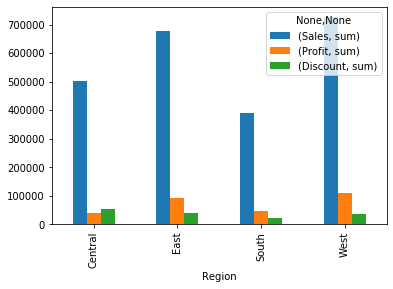

In [224]:

df.groupby(['Region'])['Sales','Profit','Discount'].agg(['sum']).plot.bar()
plt.show()

### This groupby bar plot is showing sales ,profit vs respective discount in each shipping mode .Like we can see that in standard class discount is maximum and sales and profit also more .we can also cnclude that in standerd class profit and sales are totally depens upon discount.


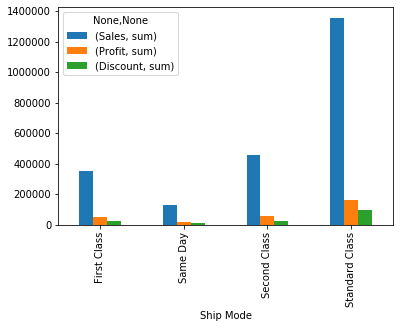

In [225]:
df.groupby(['Ship Mode'])['Sales','Profit','Discount'].agg(['sum']).plot.bar()
plt.show()

#### Sorting state name accordiing to increasing profit and area plot of profit vs sales

In [226]:
results =result.sort_values(by ='Profit',ascending =False)
results.head(15)

,State,Profit,Sales
43,Vermont,204.088936,811.760909
37,Rhode Island,130.100523,404.070643
12,Indiana,123.375411,359.431946
24,Montana,122.221900,372.623467
21,Minnesota,121.608847,335.541011
7,District of Columbia,105.958930,286.502000
6,Delaware,103.930988,285.948635
48,Wyoming,100.196000,1603.136000
23,Missouri,97.518341,336.441667
20,Michigan,96.173584,298.738756


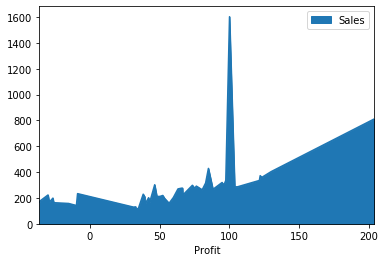

In [227]:
results.plot.area(x ='Profit',y ='Sales')
plt.show()

In [228]:
import folium
world_map =folium.Map(zoom_start =4)


In [229]:
world_geo =r'usa_state.json'


In [230]:
world_map.choropleth(
    geo_data =world_geo,
    data =df,
    columns =['State','Sales'],
    key='feature.properties.states',
    fill_color='YlGnBu',
    fill_opacity=0.7, line_opacity=0.2,
    legend_name='hist_indicator')

world_map

C:\Users\SHASHANK RAJPUT\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [231]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

## Building a ML model to predict the values of preferable Discount to make more profit.

In [232]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [233]:
df =pd.read_csv('SampleSuperstore.csv')

In [234]:
df.drop(['Country'],axis =1,inplace =True)
df['Discount']=df['Discount']*100

In [235]:
feature_cols = ['Sales', 'Profit','Quantity']
X = df[feature_cols]

y =df.Discount

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [237]:
clf = DecisionTreeClassifier()
history= clf.fit(X_train,y_train)

In [238]:
y_pred = clf.predict(X_test)
np.mean(y_pred)


15.9243081027009

In [239]:
np.mean(y_test)

15.979659886628877

In [240]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7909303101033678


#  **Thank you**